## 췌장암 환자 데이터

## #01. 패키지 설치

In [1]:
from pandas import read_excel

## #02. 데이터셋준비

|필드명|설명|비고|
|----|---|---|
|id	|교유번호||	
|age|나이||	
|sex|성별|0=여성, 1=남성|
|weight|체중||	
|OP_date|수술 날짜||	
|Recur|재발 여부|1=재발, 0=마지막 관찰시점까지 재발 안함|
|Recur_1y|1년 내 재발 여부| 1=1년 내 재발, 0=1년 내 재발 안함|
|Recur_date|재발 날짜|재발하지 않은 환자의 경우 마지막 검사 날짜|
|SBP|수축기 혈압||	
|CA19.9|종양표지자의 일종인 CA19-9값||	
|CRP|C-반응 단백질 수치||	
|CEA|종용표지자의 일종인 CEA 값||	
|post.CEA|수술 직후 CEA 값||	
|stage|암의 병기|1, 2, 3|
|smoking|흡연 여부|	1=흡연, 0=비흡연|
|obesity|비만 여부|	1=비만, 0=정상|
|post.CA19.9|수술 직후 CA19-9값||	
|post.CA19.9.binary|post.CA19.9가 37 초과이면 1, 37 이하이면 0||	
|post.CA19.9.3grp|post.CA19.9가 37 이하이면 1, 37초과 100 이히면 2, 70 초과이면 3||


In [2]:
origin = read_excel("https://data.hossam.kr/F03/biostat.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  156 non-null    int64         
 1   age                 156 non-null    int64         
 2   sex                 156 non-null    int64         
 3   weight              156 non-null    float64       
 4   OP_date             156 non-null    datetime64[ns]
 5   Recur               156 non-null    int64         
 6   Recur_1y            156 non-null    int64         
 7   Recur_date          156 non-null    datetime64[ns]
 8   SBP                 156 non-null    float64       
 9   CA19.9              156 non-null    float64       
 10  CRP                 156 non-null    float64       
 11  CEA                 156 non-null    float64       
 12  post.CEA            156 non-null    float64       
 13  stage               156 non-null    int64         

## #03. 데이터 전처리

### 불필요한 필드 제거 
> id,  post.CA19.9.binary, post.CA19.9.3grp

In [3]:
for d in ['id', 'post.CA19.9.binary', 'post.CA19.9.3grp']:
    origin.drop(d, axis=1, inplace=True)

origin.head()

,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9
0,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194
1,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043
2,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072
3,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051
4,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657


In [4]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          156 non-null    int64         
 1   sex          156 non-null    int64         
 2   weight       156 non-null    float64       
 3   OP_date      156 non-null    datetime64[ns]
 4   Recur        156 non-null    int64         
 5   Recur_1y     156 non-null    int64         
 6   Recur_date   156 non-null    datetime64[ns]
 7   SBP          156 non-null    float64       
 8   CA19.9       156 non-null    float64       
 9   CRP          156 non-null    float64       
 10  CEA          156 non-null    float64       
 11  post.CEA     156 non-null    float64       
 12  stage        156 non-null    int64         
 13  smoking      156 non-null    int64         
 14  obesity      156 non-null    int64         
 15  post.CA19.9  156 non-null    float64       
dtypes: datet

### 데이터 구분

#### 독립변수

In [12]:
# 연속형 변수
numeric = ['age', 'weight', 'SBP', 'CA19.9', 'CRP', 'CEA', 'post.CEA', 'post.CA19.9']

# 범주형 변수
category = ['sex','smoking','obesity']

#### 종속변수

|구분|설명|
|---|---|
|2|1년 내 재발|
|1|1년 외 재발|
|0|재발X|

In [10]:
#  OP_date, Recur, Recur_1y, Recur_date
origin['target'] = origin['Recur'] + origin['Recur_1y']
origin.head()

,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,target
0,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,1
1,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0
2,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0
3,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,1
4,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,1


In [11]:
# 파생변수를 만들었으니까 OP_date, Recur, Recur_1y, Recur_date 는 지우기
for v in ['OP_date', 'Recur', 'Recur_1y', 'Recur_date']:
    origin.drop(v, axis=1, inplace=True)

origin.head()

,age,sex,weight,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,target
0,82,1,73.994588,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,1
1,50,0,64.819694,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0
2,28,1,63.204675,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0
3,35,1,52.499192,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,1
4,49,1,72.766264,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,1


### 연속형 변수의 데이터 분포 확인

In [13]:
from matplotlib import pyplot as plt
import seaborn as sb

In [14]:
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

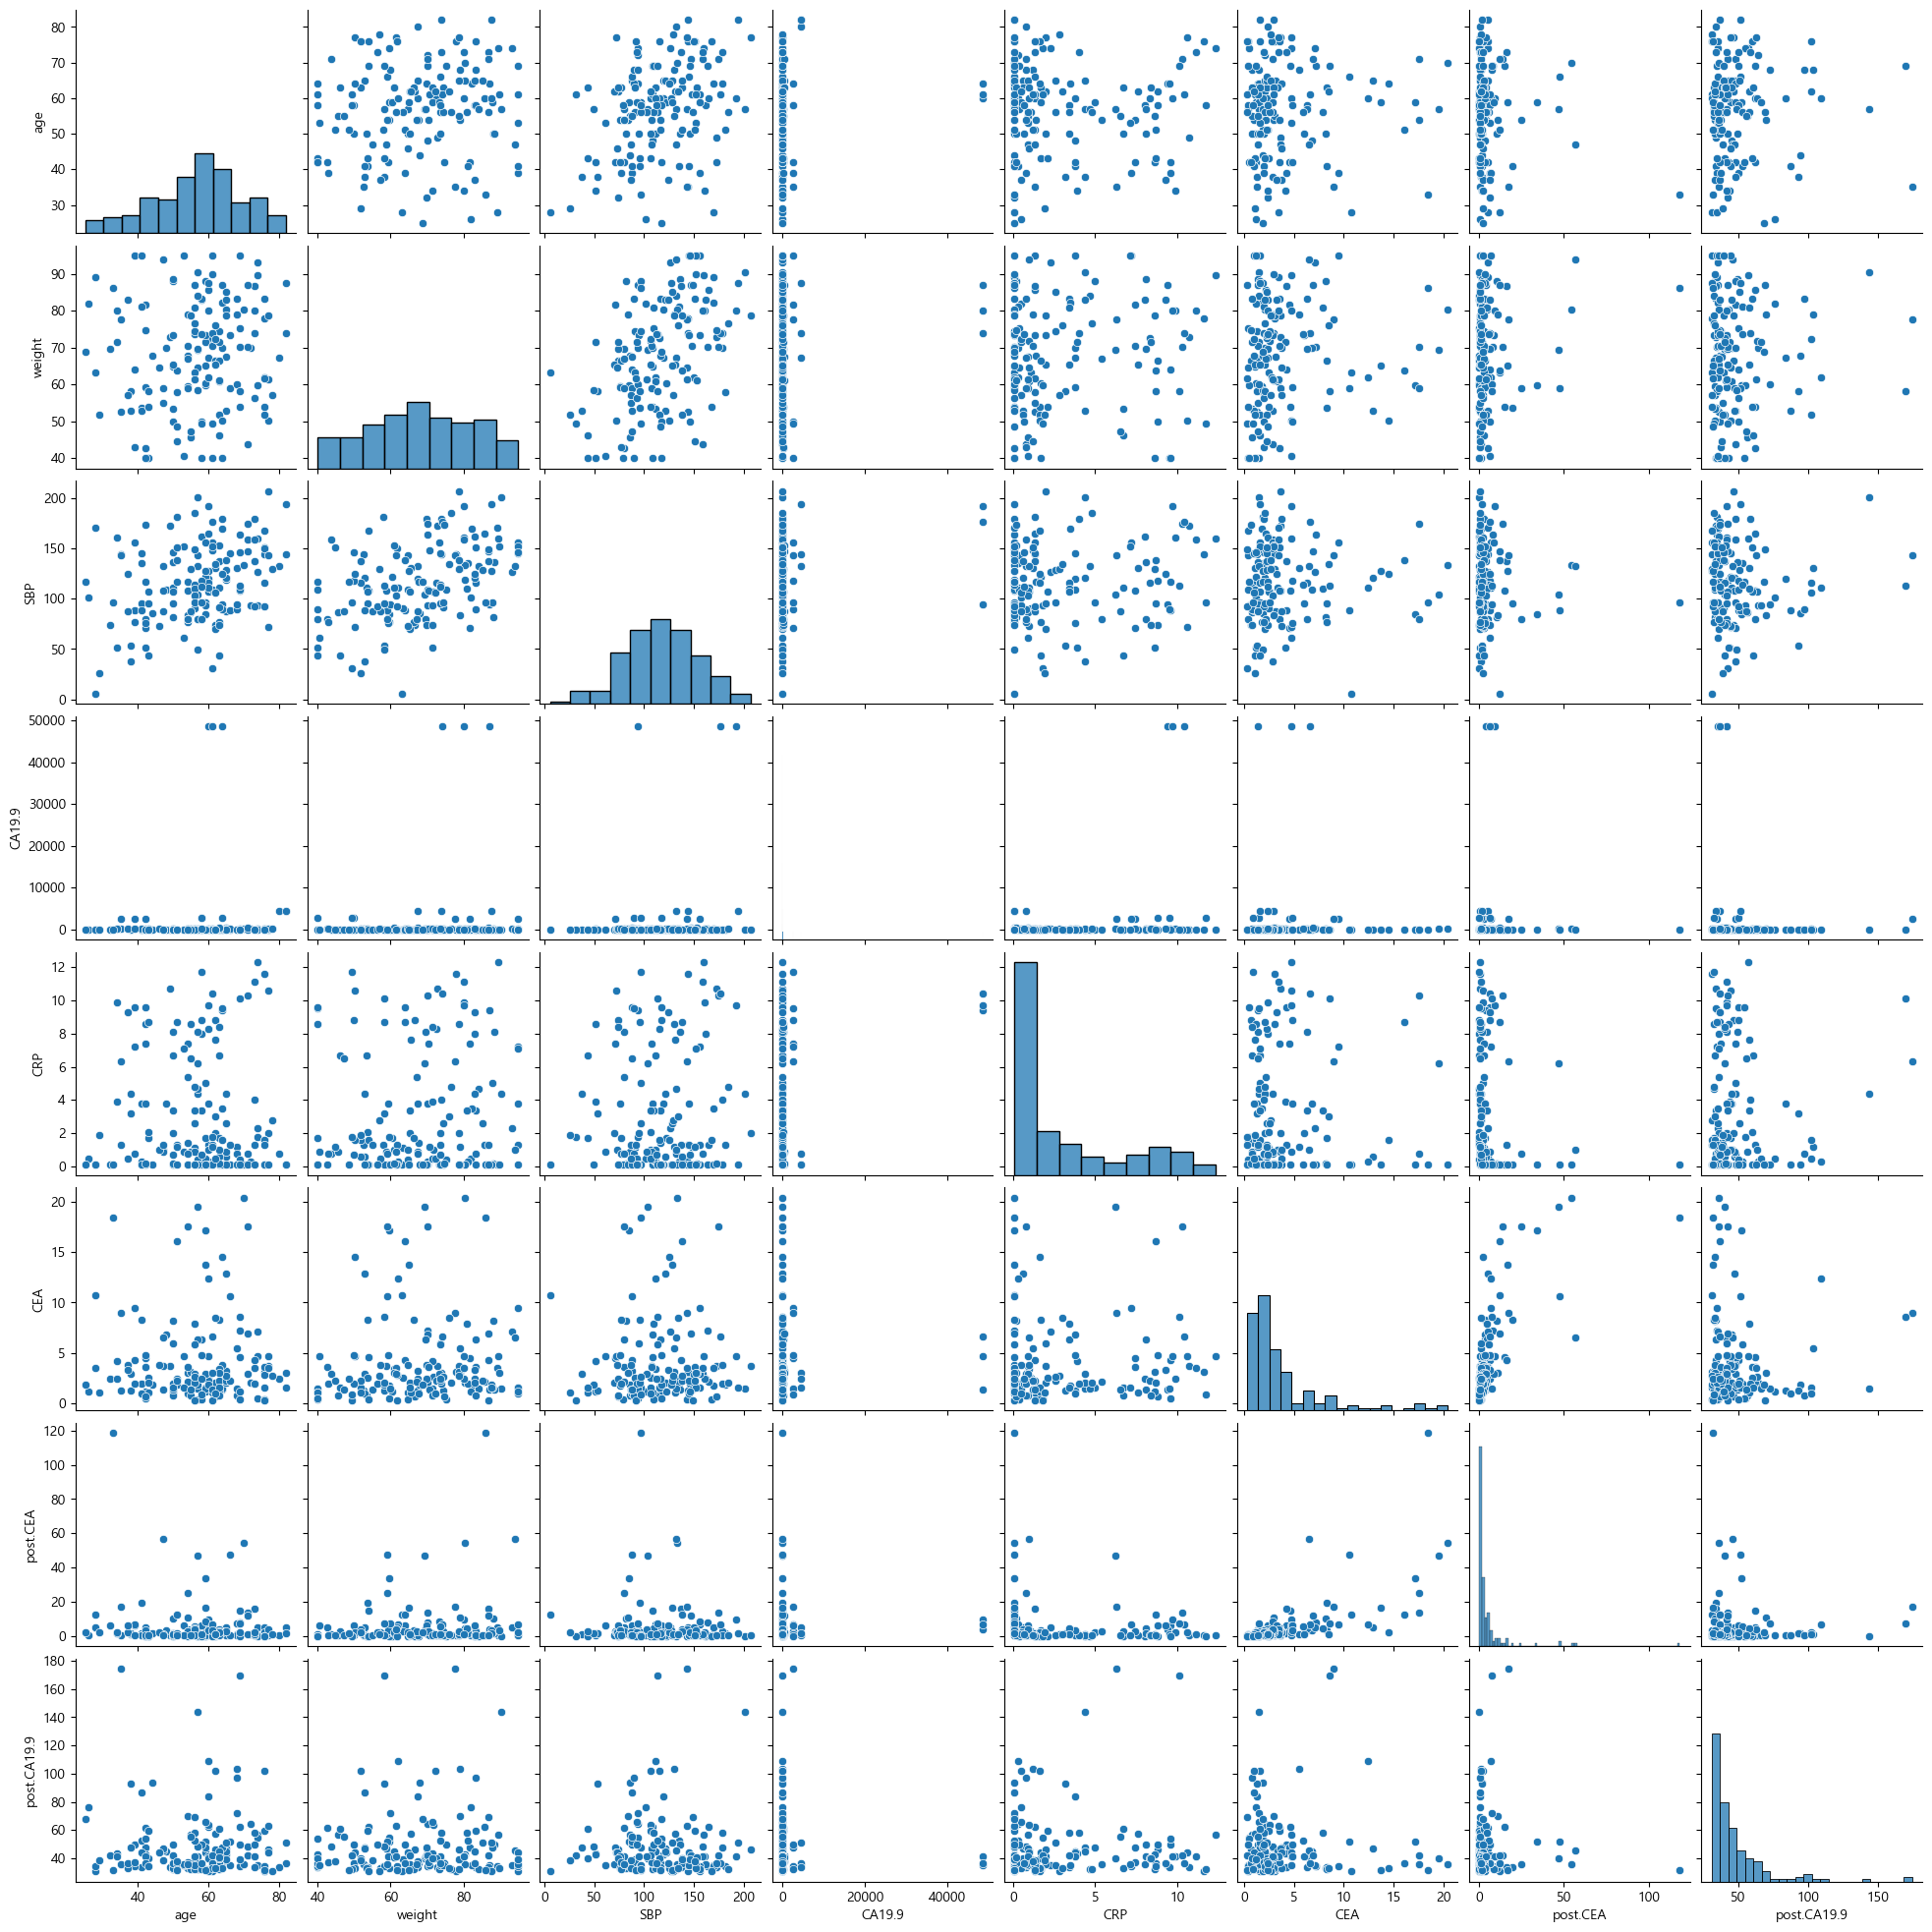

In [17]:
# pairplot으로 확인해보기
plt.figure(figsize=(15,15))
sb.pairplot(data=origin[numeric])
plt.show()
plt.close()

> CRP, CEA, post.CEA, post.CA19.9 분포에 문제가 좀...

In [18]:
len(numeric)

8

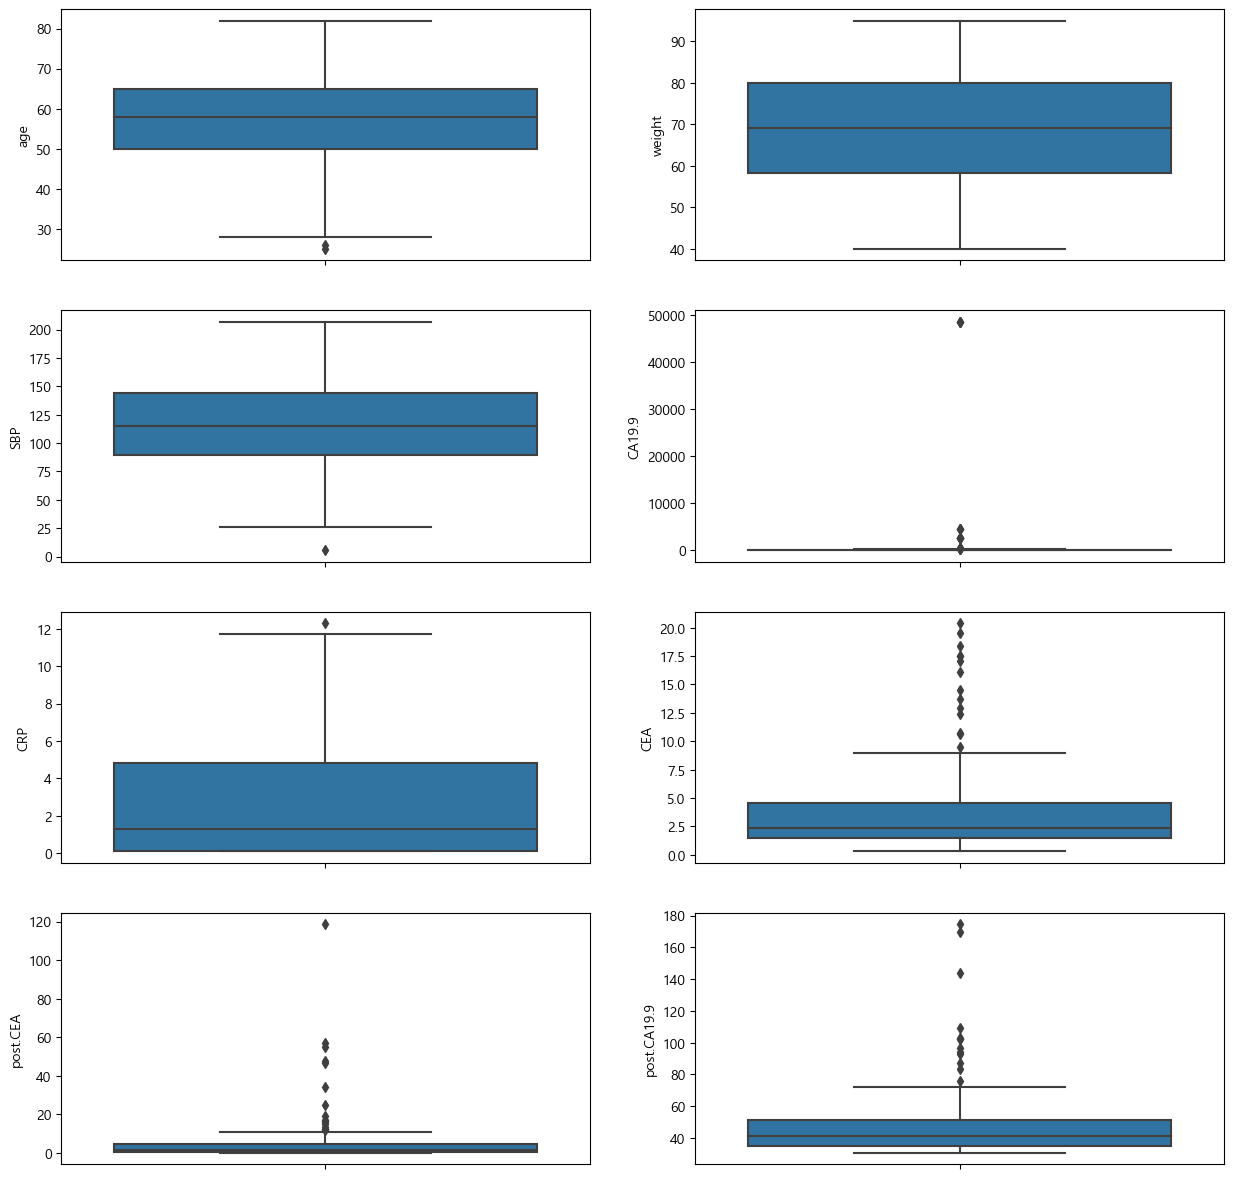

In [25]:
# boxplot
_,a = plt.subplots(len(numeric)//2 , 2, figsize=(15,15))
a_l=sum(list(map(list,a.squeeze())),[])
for col in numeric:
    sb.boxplot(data=origin,y=col,ax=a_l[numeric.index(col)])
plt.show()
plt.close()

> post.CEA, post.CA19.9, CEA, CA19.9 에서 이상치 발견

In [ ]:
# CA19.9 이상치 갯수 확인해보기
iqr = df['CA19.9'].quantile(0.75) - df['CA19.9'].quantile(0.25)
df[(df['CA19.9'] < (df['CA19.9'].quantile(0.5) - 1.5*iqr)) | (df['CA19.9']> (df['CA19.9'].quantile(0.5) + 1.5*iqr))].count()

### 연속형 변수의 이상치 처리

#### 1) CEA

In [27]:
# 기초통계량 확인
origin['CEA'].describe()

count    156.000000
mean       3.930128
std        4.135752
min        0.300000
25%        1.500000
50%        2.400000
75%        4.525000
max       20.400000
Name: CEA, dtype: float64

In [28]:
# 결측치 확인
origin['CEA'].isna().sum()

0

### 종속변수

### 데이터프레임 생성

### 차원축소
#### 연속형변수

#### 범주형변수

## #04. 탐색적 데이터 분석

## #05. 데이터 분리

## #06. 모델 생성

## #07. 학습 모델 평가

## #08. 학습 모델 적용